# How to generate external stimulus with Poisson process?

In [1]:

import numpy as np
import random
import matplotlib.pyplot as plt

def possion_generation(T,rate,dt): 
    import random
    t= 0

    spike = np.array([0 for _ in range(int(T/dt))])
    while True:
        t+= random.expovariate(((rate*dt)/1000))
        if t>int(T/dt):
            break
        spike[int(t)]=1 
    return spike
def pulse(N_x,Time,dt,rate):
    pulse_=[]
    for i in range(N_x):
        pulse_.append(possion_generation(Time,rate,dt))
    pulse_=np.array(pulse_).T
    return pulse_

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

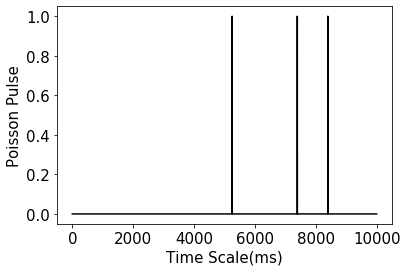

In [2]:
plt.plot(pulse(4,1000,0.1,5)[:,2],color='black')
plt.xlabel("Time Scale(ms)",fontsize=15)
plt.ylabel("Poisson Pulse",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('Poisson-Pulse5.pdf',dpi=1000, bbox_inches = 'tight')

In [3]:
def possion_generation2(T,rate,dt): 
    import random
    import math

    _lambda = rate*dt/1000
    _arrival_time = 0

    spike = np.array([0 for _ in range(int(T/dt))])
    arrival=[]
    while True:
        p = random.random()
        _inter_arrival_time = -math.log(1.0 - p)/_lambda
        _arrival_time = _arrival_time + _inter_arrival_time
        if _arrival_time>int(T/dt):
            break
        arrival.append(int(_arrival_time))
    spike[(arrival)]=1
    plt.plot(spike[0:T])
    return spike

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

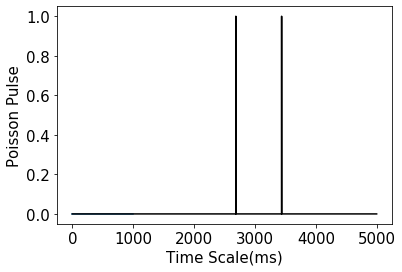

In [4]:
plt.plot(possion_generation2(1000,5,0.2),color='black')
plt.xlabel("Time Scale(ms)",fontsize=15)
plt.ylabel("Poisson Pulse",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('Poisson-Pulse5.pdf',dpi=1000, bbox_inches = 'tight')

In [5]:
def poisoon_generation3(T,rate,dt):
    time_all=[]
    _lambda=rate*dt/T
    _arrival_time = 0

    spike = np.array([0 for _ in range(int(T/dt))])
    while True:
        t= random.gammavariate(i, 1000/(rate*dt))
        if t>int(T/dt):
            break
        time_all.append(int(t))
    spike[(time_all)]=1
    
    return spike


# 参数的定义

In [38]:
#Sparsely connected matrix
def EI_M(Number1,Number2,pr,J):
    matrix=np.zeros((Number1,Number2))
    matrix_p=np.random.rand(Number1,Number2)
    matrix[matrix_p<pr]=J
    return matrix

N=10000
N_e=int(N*0.8)
N_i=int(N*0.2)
tau_m=20
V_t=-52
V_r=-70
p=0.1
tref=2
K_e=p*N_e
K_i = p*N_i
j_ee=25 
j_ie=112.5
j_ei=150
j_ii=250
j_exte=170
j_exti=125

J_ee=j_ee/np.sqrt(N); 
J_ie=j_ie/np.sqrt(N); 
J_ei=j_ei/np.sqrt(N); 
J_ii=j_ii/np.sqrt(N); 


J_exte=j_exte/np.sqrt(N);
J_exti=j_exti/np.sqrt(N);
#J_ext=0.5:itdepends on the condition
#delay=1:Omit it first


#connection matrices:
M_EE=EI_M(N_e,N_e,p,J_ee)
M_IE=EI_M(N_i,N_e,p,J_ie)
M_EI = EI_M(N_e,N_i,p,J_ei)
M_II =EI_M(N_i,N_i,p,J_ii)
#initial voltage
J_EXEE=EI_M(N_e,N_e,p,J_exte)
J_EXII=EI_M(N_i,N_e,p,J_exti)


## The matrice to realize the rest-time.
def update_matrix1(M):    
    N=np.array(M)*1
    N[np.where(M>0)]=0
    N[np.where(M==0)]=1    
    return N
def update_matrix2(M,dt,rest):
    N=np.array(M)*1
    N[M>=((rest/dt)-1)]=0
    return N
def turn_2_zero(M):
    if M<0:
        return 0
    else:
        return M
    
    
## The matrix to initialize the voltage      
def randlc(N_x,up,down):
    import random
    rando=[]
    for i in range(N_x):
        rando.append(random.uniform(down,up))
    return np.array(rando).reshape(N_x,1)

## 利用更新方程：
$$
{V_{i}^{\alpha}(t+dt)-V_{i}^{\alpha}(t)}=(-V_{i}^{\alpha}(t))\frac{dt}{\tau_m}+\int_{t}^{t+dt}\left(\sum_{j=1}^{N_{E}} J_{i j}^{\alpha E} \sum_{k} \delta\left(t-t_{j k}^{E}\right)-\sum_{j=1}^{N_{I}} J_{i j}^{\alpha I} \sum_{k} \delta\left(t-t_{j k}^{I}\right)+(f_{i}^{\alpha}(t))_{out}\right) dt,\\
(I_{i}^{\alpha}(t))_{out} =\int_{t}^{t+dt}{\sum_{j=1}^{N_{E}} J_{i j}^{out-\alpha} \sum_{k} \delta\left(t-t_{j k}^{out}\right)}dt,\\
I_{E}^{\alpha}(t) =\int_{t}^{t+dt}{\sum_{j=1}^{N_{E}} J_{i j}^{\alpha E} \sum_{k} \delta\left(t-t_{j k}^{E}\right)+\sum_{j=1}^{N_{E}} J_{i j}^{out-\alpha} \sum_{k} \delta\left(t-t_{j k}^{out}\right)}dt,\\
I_{I}^{\alpha}(t) = \int_{t}^{t+dt}{-\sum_{j=1}^{N_{I}} J_{i j}^{\alpha I} \sum_{k} \delta\left(t-t_{j k}^{I}\right)}dt
$$


In [39]:
def time_interaction(dt,T,tau):
    
    max_pic=int(T/dt)
    pulse_e=pulse(N_e,T,dt,5)
    pulse_i=pulse(N_e,T,dt,5)
    
    V_e=randlc(N_e,V_t,V_r)
    V_i=randlc(N_i,V_t,V_r)
    V_e_all=[]
    V_i_all=[]
    
    Ve_count=np.zeros((N_e,1))
    Vi_count=np.zeros((N_i,1))
    
    current_i=[]
    current_e=[]
    currents=[]
    Total_spike_e=[]
    Total_spike_i = []
    for t in np.linspace(dt,T,max_pic):
        
        Ve_count=update_matrix2(Ve_count,dt,tref)
        Vi_count=update_matrix2(Vi_count,dt,tref)
        
        V_e_all.append((V_e)*1)
        V_i_all.append((V_i)*1)
        
        
        spick_num_ie=np.zeros((N_i,1))
        spick_num_ii=np.zeros((N_i,1))
                
        spick_num_ee=np.zeros((N_e,1))
        spick_num_ei=np.zeros((N_e,1))
        
        
        
        index_spike_e=np.where(V_e>=V_t)
        
        
        
        if (len(index_spike_e[0])>0):
            V_e[index_spike_e]=V_r
           
            for j in range(len(index_spike_e[0])): 
                numee_index=np.where(M_EE[:,index_spike_e[0][j]]!=0)
                spick_num_ee[numee_index] = spick_num_ee[numee_index]+1
                
                numie_index=np.where(M_IE[:,index_spike_e[0][j]]!=0)
                spick_num_ie[numie_index] = spick_num_ie[numie_index]+1
          
       
        index_spike_i=np.where(V_i>=V_t)    

        if (len(index_spike_i[0])>0):
            V_i[index_spike_i]=V_r 
            for k in range(len(index_spike_i[0])):
                numei_index=np.where(M_EI[:,index_spike_i[0][k]]!=0)
                spick_num_ei[numei_index]=spick_num_ei[numei_index]+1 
                
                numii_index=np.where(M_II[:,index_spike_i[0][k]]!=0)
                spick_num_ii[numii_index] = spick_num_ii[numii_index]+1
                
      
        list_e=list(set(list(np.where(Ve_count>0)[0])+list(index_spike_e[0])))
        list_i=list(set(list(np.where(Vi_count>0)[0])+list(index_spike_i[0])))

        Ve_count[list_e] = Ve_count[list_e]+1
        Vi_count[list_i] = Vi_count[list_i]+1

        s1=pulse_e[int(t/dt-1)].reshape(N_e,1)
        s2=pulse_i[int(t/dt-1)].reshape(N_e,1)

        V_e=V_e*1+((J_ee*spick_num_ee-J_ei*spick_num_ei+np.dot(J_EXEE,s1))*1)*update_matrix1(Ve_count)
        V_i = V_i*1+ ((J_ie*spick_num_ie-J_ii*spick_num_ii*1+np.dot(J_EXII,s2))*1)*update_matrix1(Vi_count)
        
        V_e = V_e*1+(dt/tau)*(-V_e+V_r)*1*update_matrix1(Ve_count)
        V_i = V_i*1+(dt/tau)*(-V_i+V_r)*1*update_matrix1(Vi_count)
        Total_spike_e.append(len(index_spike_e[0]))
        Total_spike_i.append(len(index_spike_i[0]))
    
        current_e.append(((J_ee*spick_num_ee+np.dot(J_EXEE,s1))))
        current_i.append(-J_ei*spick_num_ei*1)
    r_e = np.sum(Total_spike_e)/((T*0.001)*N_e)
    r_i = np.sum(Total_spike_i)/((T*0.001)*N_i)
    print(r_e)
    print(r_i)

    return V_e_all,V_i_all,current_e,current_i
            
            

In [40]:
V_e_all,V_i_all,current_e,current_i=time_interaction(0.2,400,tau=20)


11.6109375
33.3625


In [41]:
fit3=[]
fit2=[]
for i in range(400):
    fit2.append(np.average((np.average((np.squeeze(current_i)),axis=1))[int(i*5):int((i+1)*5)]))



fit1=[]
for i in range(400):
    fit1.append(np.average((np.average((np.squeeze(current_e)),axis=1))[int(i*5):int((i+1)*5)]))
fit3=np.array(fit1)+np.array(fit2)
# plt.plot(fit2,label=r'$I_I$',linewidth=0.5)
# plt.plot(fit1,color='red',label=r'$I_E+h_E$',linewidth=1.0)

# plt.plot(fit3,color='black',label='Total current',linewidth=1.5)
# plt.legend()

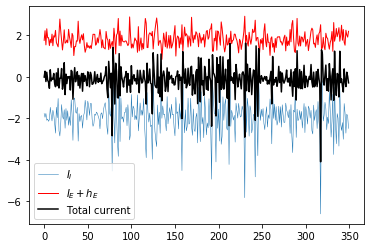

In [42]:
#Average currents: not stable in this model!
plt.plot(fit2[50:400],label=r'$I_I$',linewidth=0.5)
plt.plot(fit1[50:400],color='red',label=r'$I_E+h_E$',linewidth=1.0)

plt.plot(fit3[50:400],color='black',label='Total current',linewidth=1.5)
plt.legend()

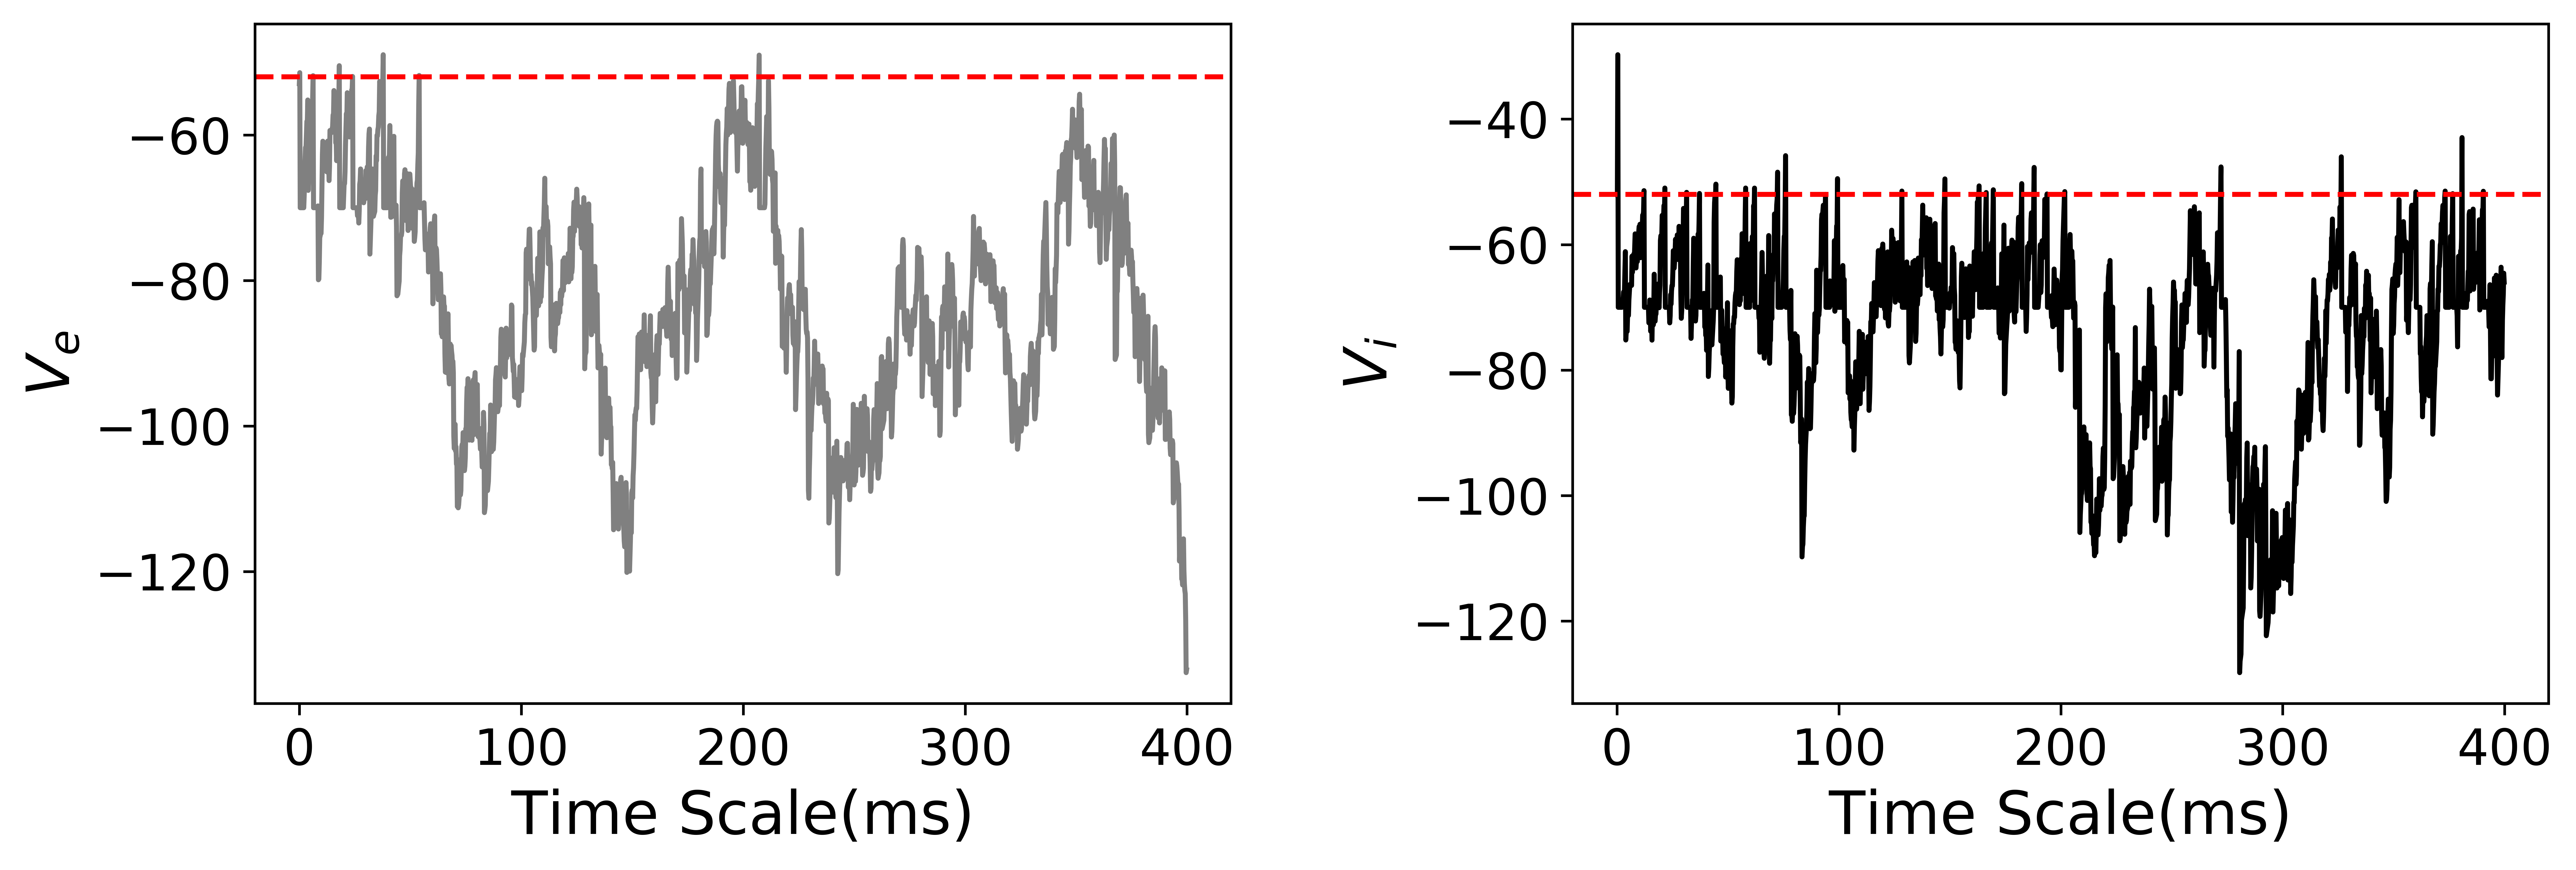

In [45]:
from pylab import *  
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

fig = plt.figure(num=2, figsize=(12,8),dpi=1000)
subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95,hspace=0.25,wspace=0.35)
#使用add_subplot在窗口加子图，其本质就是添加坐标系
#三个参数分别为：行数，列数，本子图是所有子图中的第几个，最后一个参数设置错了子图可能发生重叠
ax1 = fig.add_subplot(2,2,1)  
ax2 = fig.add_subplot(2,2,2)
number=7
xx=np.linspace(0,(400-0.2),int(400/0.2))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8


ax1.plot(xx,np.squeeze(V_e_all)[:,139],color='grey')

ax1.set_xlabel('Time Scale(ms)',fontdict={'size'   : 18})
ax1.set_ylabel(r'$V_e$',fontdict={'size'   : 18})
ax1.axhline(y=-52, color='red', linestyle='--')
ax1.tick_params(labelsize=15) 

ax2.plot(xx,np.squeeze(V_i_all)[:,109],color='black')


ax2.set_xlabel('Time Scale(ms)',size=18)
ax2.set_ylabel(r'$V_i$',fontdict={'size'   : 18})
ax2.axhline(y=-52, color='red', linestyle='--')
ax2.tick_params(labelsize=15) 
# plt.savefig('membrane.pdf',dpi=1000, bbox_inches = 'tight')

plt.show()